# We ROLLed dice and tried to see which ones are loaded!

In [374]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import scipy 
import pandas as pd
import seaborn as sns
from matplotlib.colors import LogNorm

In [24]:
#Game of dice. 
#If the house wins we return a one, else zero

def Rolling(PosOut, Probs, ProbsHouse):
    
    Sum1 = 0
    Sum2 = 0
    
    while Sum1 == Sum2:
        
        value1 = np.random.multinomial(n=PosOut, pvals=ProbsHouse)
        value2 = np.random.multinomial(n=PosOut, pvals=Probs)
    
        Sum1 = sum(np.where(value1 !=0)[0]) + 2
        Sum2 = sum(np.where(value2 !=0)[0]) + 2
        
        if len(np.where(value1 !=0)[0]) == 1: #Degeneracies 
            Sum1 = 2*sum(np.where(value1 !=0)[0]) + 2
        elif len(np.where(value2 !=0)[0]) == 1:
            Sum2 = 2*sum(np.where(value2 !=0)[0]) + 2
        
    if Sum2 > Sum1: #House Lost
        return 0
    else:
        return 1    #House Won
        

In [25]:
#Significance testing
def Alpha_Und_Beta(Dos_Params):
    
    Dos0   = Dos_Params[0][1]
    Dos1   = Dos_Params[1][1]
    
    test = stats.ks_2samp(Dos0, Dos1)
    
    print("This is obtained critical value, beta and power respectively: " + str(crit_val)+" "+str(beta)+" "+ str(power))
    return test

In [26]:
# Obtain our probabilities and normalize them
def sum_to_one(p):
    flag = False
    while flag == False:
        s = np.random.normal(size = 6, loc = p)
        normalize1 = abs(s/sum(s))
        if sum(normalize1) == 1:
            flag == True
            return(normalize1)

In [7]:
%%capture
nexp = 1000
roll = 100
univ = 500
dice = 2
location = 0.5
multi_verse = []
poss1 = []
poss2 = []
Stdev = []
Avg    = []

for i in range(0,univ):
    
    probs        = sum_to_one(location)  # [1,2,3,4,5,6]
    probb2       = probs                 # [1,2,3,4,5,6]
    poss1.append(probs)
    poss2.append(probb2)
    
    Expm = [[Rolling(dice, probs, probb2) for i in range(0,roll)] for t in range(0,nexp)] 
    Expm = np.array(Expm)
    
    b = np.sum(Expm,axis=1) # frequency counting for a whole experiment 
    multi_verse.append(b)
    ddos0 = plt.hist(b, roll+1, density=True, facecolor='b', stacked =True, alpha=0.7)
    
    Avg.append(np.mean(ddos0[1]))
    Stdev.append(np.std(ddos0[1]))

In [169]:
def Most_Likely(multi_verse, null):
    Al_Bet = []
    ddos0 = plt.hist(multi_verse[null], roll, density=True, facecolor='b', stacked =True, alpha=0.7)[1]
    for i in range (0,univ):
        b = multi_verse[i]
        ddos1 = plt.hist(b, roll, density=True, facecolor='b', stacked =True, alpha=0.7)[1]
        Al_Bet.append(stats.ks_2samp(ddos0, b, alternative='two-sided'))
    return Al_Bet


5.045743137489641
55.5
64.0


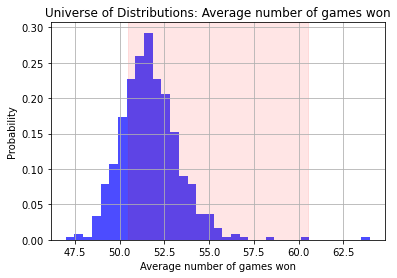

In [875]:
Avg = [round(i,3) for i in Avg]

title = "Universe of Distributions: Average number of games won"
multi_b = plt.hist(Avg, 35, density=True, facecolor='b', stacked =True, alpha=0.7)

mean0 =np.mean(multi_b[1])
std0 =np.std(multi_b[1])

plt.axvspan(mean0-std0, mean0+std0, alpha=0.1, color='red')
plt.title(title)
plt.grid()
plt.xlabel("Average number of games won")
plt.ylabel("Probability")

plt.axvspan(mean0, mean0, alpha=0., color='red')

print(std0)
print(mean0)
print(max(multi_b[1]))

In [877]:
# Choose some "distirbution" in our universe and make comparisons to that. 
a = np.where(multi_b[0] == max(multi_b[0]))
print("The location of the most likely # games won " +str(a[0][0]))
print("The value " +str(np.round(multi_b[1][9],2)))
print("The probability is: "+str(100*round(multi_b[0][9],4))+"%")

The location of the most likely # games won 9
The value 51.37
The probability is: 29.24%


The naive mean is located at X = 55 games. However, if we were to look for the one that maximizes the distribution, that would be found at x=51.37 games. Most of the distibution is located at a naive mean and sigma in the red. 

In [853]:
#%%capture
# We will find places where the Std varies greatly with different means.
Stdev = np.array(Stdev)
#print(Stdev)
el = np.where(Stdev < 8)[0]
em = np.where(Stdev > 9)[0]
oh = np.where(Stdev > 10)[0]
pe = np.where(Stdev > 11)[0]

print(el)
print(em)
print(oh)
print(pe)

[ 33  61 319 363]
[  0   3   4   5   6   7   8   9  12  13  14  15  16  18  19  20  21  22
  23  25  26  27  28  29  31  32  35  37  38  39  40  41  43  44  46  49
  50  51  52  55  58  60  62  63  65  66  67  69  70  72  74  76  78  79
  80  81  82  83  85  86  87  89  91  92  93  94  95  96  97  98  99 100
 102 103 105 106 107 108 109 110 111 113 115 117 118 119 120 121 122 123
 124 126 127 128 129 130 132 134 135 136 137 138 139 140 141 144 145 146
 147 148 149 150 151 154 155 157 160 161 162 163 164 167 168 169 171 174
 176 177 178 179 181 182 183 184 186 187 188 189 190 192 193 194 195 196
 198 199 200 201 202 203 205 206 208 209 210 211 212 213 214 216 217 218
 219 220 221 222 223 224 225 226 229 230 231 232 233 234 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 253 254 255 256 257 259 261
 262 263 264 265 266 267 269 270 271 275 277 278 279 280 283 284 285 286
 287 288 290 291 292 293 295 297 298 300 301 302 303 305 306 307 308 309
 310 311 312 314 315 318 320 323 

The means are: 51.49999999999998


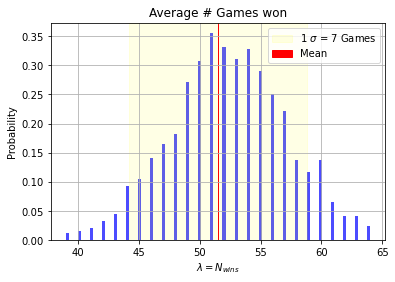

The means are: 50.50000000000001


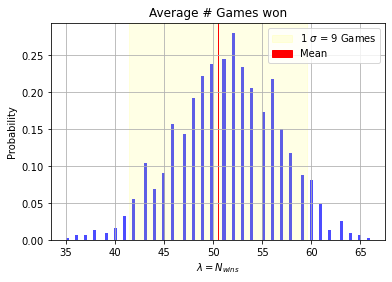

The means are: 52.50000000000001


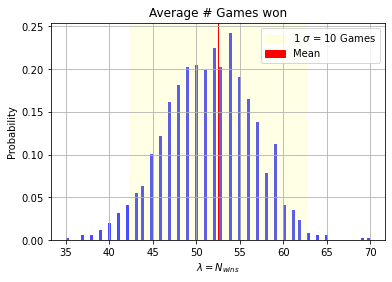

The means are: 54.0


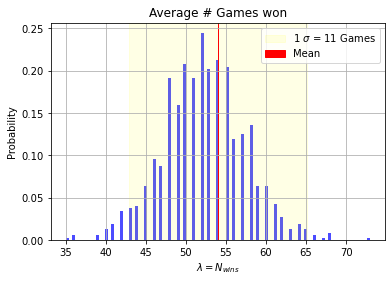

In [854]:
for e in (el[1],em[11],oh[30],pe[8]):
    b = multi_verse[e]
    title = "Average # Games won"
    plt.figure()
    dos0 = plt.hist(b, roll+1, density=True, facecolor='b', stacked =True, alpha=0.7)
    
    sigma0 = np.std(dos0[1])
    mean0 = np.mean(dos0[1])
    
    print("The means are: "+ str(mean0))

    plt.xlabel('$\\lambda = N_{wins}$')
    plt.ylabel('Probability')
    plt.title(title)
    plt.axvspan(mean0-sigma0, sigma0+mean0, alpha=0.1, color='yellow',label = '1 $\\sigma$ = ' +str(round(sigma0))+" Games")
    plt.axvspan(mean0, mean0, alpha=1, color='red',label = 'Mean')
    plt.grid(True)
    plt.legend()
    plt.show()

In [449]:
(el[1],em[11],oh[30],pe[8]) #Location of the above entries in the multiverse

(61, 15, 232, 480)

In [196]:
%%capture
Al_Bet_15  = Most_Likely(multi_verse,15)
Al_Bet_61  = Most_Likely(multi_verse,61)
Al_Bet_98 = Most_Likely(multi_verse,98)
Al_Bet_232  = Most_Likely(multi_verse,232)

Text(0.5, 1.0, 'Kolmogorov–Smirnov Two Tail Test')

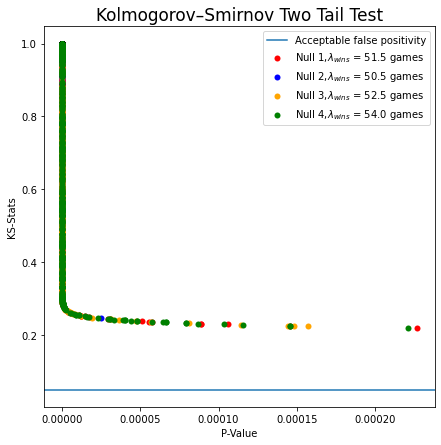

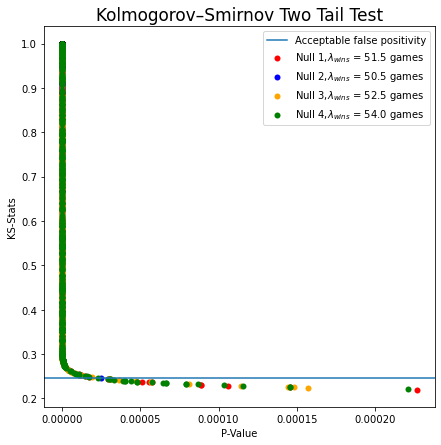

In [880]:
signif = 0.05 #Acceptable rate false positivitiy (Declaring the null false when it is true!)
df15 = pd.DataFrame(Al_Bet_15,columns=['KSstats','PValue'])
df61 = pd.DataFrame(Al_Bet_61,columns=['KSstats','PValue'])
df98 = pd.DataFrame(Al_Bet_98,columns=['KSstats','PValue'])
df232 = pd.DataFrame(Al_Bet_232,columns=['KSstats','PValue'])
#df.head()

# visualize and save our data
title = "Kolmogorov–Smirnov Two Tail Test"
plt.figure(figsize=(7,7))
plt.ticklabel_format(style='scientific', axis='x')
plt.scatter(df15.PValue,df15.KSstats, color='red',label = 'Null 1,$\\lambda_{wins}$ = 51.5 games', linewidths= .01)
plt.scatter(df61.PValue,df61.KSstats,color='blue',label = 'Null 2,$\\lambda_{wins}$ = 50.5 games',linewidths= .01)
plt.scatter(df98.PValue,df98.KSstats,color='orange',label = 'Null 3,$\\lambda_{wins}$ = 52.5 games',linewidths= .01)
plt.scatter(df232.PValue,df232.KSstats, color='green',label = 'Null 4,$\\lambda_{wins}$ = 54.0 games',linewidths= .01)
plt.axhline(signif,label="Acceptable false positivity")
plt.xlabel("P-Value")
plt.ylabel("KS-Stats")
plt.legend()
plt.title(title,fontsize=17)


# visualize and save our data (Zoom in a bin)-Maybe do Inset
title = "Kolmogorov–Smirnov Two Tail Test"
plt.figure(figsize=(7,7))
plt.ticklabel_format(style='scientific', axis='x')
plt.scatter(df15.PValue,df15.KSstats, color='red',label = 'Null 1,$\\lambda_{wins}$ = 51.5 games', linewidths= .01)
plt.scatter(df61.PValue,df61.KSstats,color='blue',label = 'Null 2,$\\lambda_{wins}$ = 50.5 games',linewidths= .01)
plt.scatter(df98.PValue,df98.KSstats,color='orange',label = 'Null 3,$\\lambda_{wins}$ = 52.5 games',linewidths= .01)
plt.scatter(df232.PValue,df232.KSstats, color='green',label = 'Null 4,$\\lambda_{wins}$ = 54.0 games',linewidths= .01)
plt.axhline(min(df61.KSstats),label="Acceptable false positivity")
plt.xlabel("P-Value")
plt.ylabel("KS-Stats")
plt.legend()
plt.title(title,fontsize=17)


# Here we employ a two-sample Kolmogorov–Smirnov test, using 4 representative distributions as the null candidate. In All cases, we have a clear distinction between the the different distributions: however, the candidate distribution with the most likey Average wins (50.5) was more pronounced. i = 0 crit = [1.22,1.36,1.48,1.63,1.73,1.95] crit[5]*np.sqrt(2/univ)

In [846]:
i = 5
crit = [1.22,1.36,1.48,1.63,1.73,1.95] 
crit[i]*np.sqrt(2/univ)

0.12332882874656678

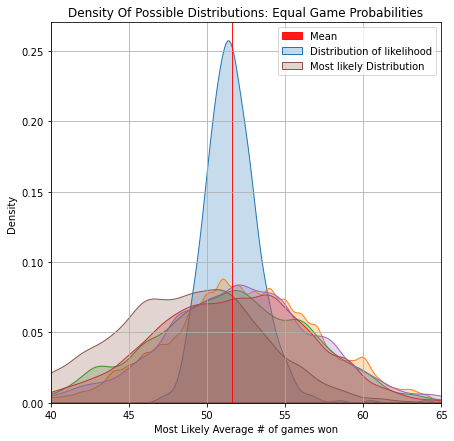

In [839]:
mean0 = np.mean(Avg)
std   = np.mean(Stdev)

title = "Density Of Possible Distributions: Equal Game Probabilities"
plt.figure(figsize=(7,7))
sns.kdeplot(Avg, bw_method=0.25,fill=True, common_norm=False, palette="crest",label ='Distribution of likelihood')
sns.kdeplot(multi_verse[61], bw_method=0.10,fill=True, common_norm=False, palette="crest")
sns.kdeplot(multi_verse[15], bw_method=0.15,fill=True, common_norm=False, palette="crest")
sns.kdeplot(multi_verse[232], bw_method=0.15,fill=True, common_norm=False, palette="crest")
sns.kdeplot(multi_verse[480], bw_method=0.15,fill=True, common_norm=False, palette="crest")
sns.kdeplot(multi_verse_2[18], bw_method=0.15,fill=True, common_norm=False, palette="crest",label = 'Most likely Distribution')
plt.axvspan(mean0, mean0, alpha=0.9, color='red',label = 'Mean')
plt.xlim(40,65)
plt.legend()
plt.title(title)
plt.grid()
plt.xlabel("Most Likely Average # of games won")
plt.show()

#We will see whether the probabilities truly have any effect by having both players seperately generate probabilities.
(The chances of them generating the same proababilities should be less than the chances of them getting the same number!)

for paper 3!!!

find Maximum after making fucntion, then use below fucntion (make into p-value fucntion)

stats.ks_2samp(rvs1, rvs3)

In [520]:
%%capture
nexp = 1000
roll = 100
univ = 500
dice = 2
location = 0.5
multi_verse_2 = []
poss1_2 = []
poss2_2 = []
Stdev_2 = []
Avg_2    = []

for i in range(0,univ):
    
    probs        = sum_to_one(location)  # [1,2,3,4,5,6]
    probb2       = sum_to_one(location)                 # [1,2,3,4,5,6]
    poss1_2.append(probs)
    poss2_2.append(probb2)
    
    Expm = [[Rolling(dice, probs, probb2) for i in range(0,roll)] for t in range(0,nexp)] 
    Expm = np.array(Expm)
    
    b = np.sum(Expm,axis=1) # frequency counting for a whole experiment 
    multi_verse_2.append(b)
    ddos0 = plt.hist(b, roll+1, density=True, facecolor='b', stacked =True, alpha=0.7)
    
    Avg_2.append(np.mean(ddos0[1]))
    Stdev_2.append(np.std(ddos0[1]))

In [714]:
# Choose some "distirbution" in our universe and make comparisons to that. 
a = np.where(multi_b_2[0] == max(multi_b_2[0]))
print("The location of the most likely # games won " +str(a[0][0]))
print("The value " +str(multi_b[1][18]))
print("The probability is: "+str(100*round(multi_b_2[0][18],4))+"%")

The location of the most likely # games won 18
The value 55.74285714285714
The probability is: 2.88%


24.339183086811556
49.25000000000001
90.50000000000001


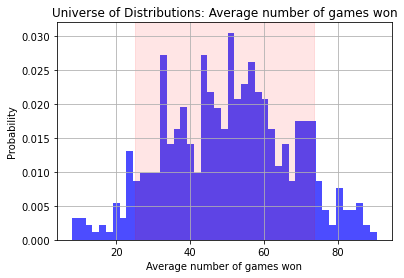

In [876]:
title = "Universe of Distributions: Average number of games won"
multi_b_2 = plt.hist(Avg_2, 45, density=True, facecolor='b', stacked =True, alpha=0.7)

mean0 = np.mean(multi_b_2[1])
std0  = np.std(multi_b_2[1])

plt.axvspan(mean0-std0, mean0+std0, alpha=0.1, color='red')
plt.title(title)
plt.grid()

plt.xlabel("Average number of games won")
plt.ylabel("Probability")

print(std0)
print(mean0)
print(max(multi_b_2[1]))

In [857]:
#%%capture
# We will find places where the Std varies greatly with different means.
Stdev = np.array(Stdev_2)
#print(Stdev)
el = np.where(Stdev < 8)[0]
em = np.where(Stdev > 9)[0]
oh = np.where(Stdev > 10)[0]
pe = np.where(Stdev > 11)[0]

print(el)
print(em)
print(oh)
print(pe)

[  9  13  16  24  47  50  60  61  63  74  76  78  80  81  85  88  91 104
 107 109 111 112 114 119 121 128 129 139 146 150 155 160 164 166 169 184
 187 195 196 199 210 212 215 223 224 244 258 276 278 279 285 287 288 290
 295 309 313 320 322 324 325 328 330 333 338 347 351 352 360 370 374 375
 388 389 392 393 405 412 421 422 428 431 442 445 472 475 477 483 486 496]
[  0   1   3   5   8  10  11  14  15  18  20  21  26  27  30  32  33  35
  36  37  38  39  40  41  42  43  45  46  48  54  55  59  62  65  66  69
  70  73  75  77  79  82  83  84  86  87  89  90  92  93  95  97  98  99
 102 103 105 113 115 117 118 126 127 130 131 132 133 136 137 143 145 148
 152 154 157 158 159 172 173 174 175 176 177 179 180 181 182 183 188 191
 192 194 198 200 202 203 205 207 208 209 213 214 217 220 225 228 229 231
 232 233 235 236 237 238 239 242 243 246 247 248 249 250 251 252 253 254
 256 259 262 264 266 267 268 271 273 275 280 289 293 294 297 298 299 300
 301 302 303 304 305 306 307 310 311 316 317 319 3

The means are: 15.5


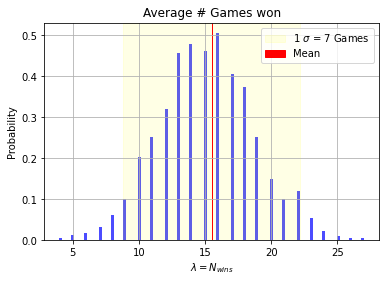

The means are: 52.00000000000001


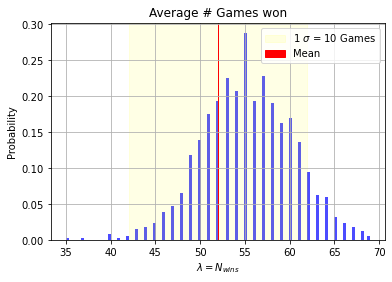

The means are: 61.50000000000001


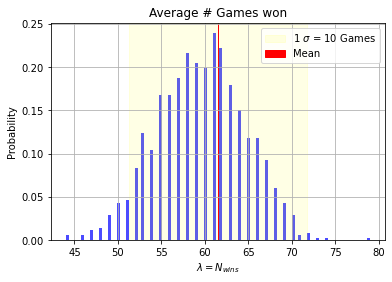

The means are: 59.0


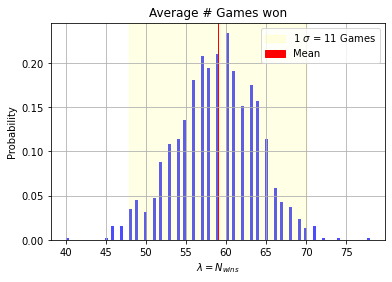

In [860]:
for e in (el[1],em[11],oh[30],pe[4]):
    b = multi_verse_2[e]
    title = "Average # Games won"
    plt.figure()
    dos0 = plt.hist(b, roll+1, density=True, facecolor='b', stacked =True, alpha=0.7)
    
    sigma0 = np.std(dos0[1])
    mean0 = np.mean(dos0[1])
    
    print("The means are: "+ str(mean0))

    plt.xlabel('$\\lambda = N_{wins}$')
    plt.ylabel('Probability')
    plt.title(title)
    plt.axvspan(mean0-sigma0, sigma0+mean0, alpha=0.1, color='yellow',label = '1 $\\sigma$ = ' +str(round(sigma0))+" Games")
    plt.axvspan(mean0, mean0, alpha=1, color='red',label = 'Mean')
    plt.grid(True)
    plt.legend()
    plt.show()

In [861]:
(el[1],em[11],oh[30],pe[4]) #Location of the above entries in the multiverse

(13, 21, 409, 443)

In [745]:
%%capture
Al_Bet_15_2  = Most_Likely(multi_verse_2,15)
Al_Bet_61_2  = Most_Likely(multi_verse_2,61)
Al_Bet_480_2 = Most_Likely(multi_verse_2,480)
Al_Bet_232_2 = Most_Likely(multi_verse_2,232)

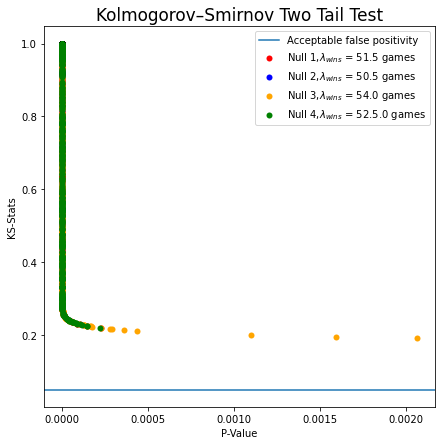

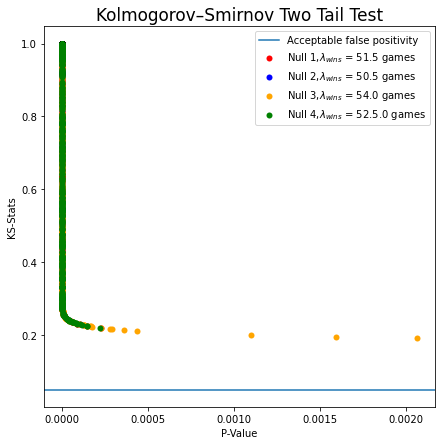

In [878]:
signif = 0.05 #Acceptable rate false positivitiy (Declaring the null false when it is true!)
df15_2 = pd.DataFrame(Al_Bet_15_2,columns=['KSstats','PValue'])
df61_2 = pd.DataFrame(Al_Bet_61_2,columns=['KSstats','PValue'])
df480_2 = pd.DataFrame(Al_Bet_480_2,columns=['KSstats','PValue'])
df232_2 = pd.DataFrame(Al_Bet_232_2,columns=['KSstats','PValue'])
#df.head()

# visualize and save our data
title = "Kolmogorov–Smirnov Two Tail Test"
plt.figure(figsize=(7,7))
plt.ticklabel_format(style='scientific', axis='x')
plt.scatter(df15_2.PValue,df15_2.KSstats, color='red',label = 'Null 1,$\\lambda_{wins}$ = 51.5 games', linewidths= .01)
plt.scatter(df61_2.PValue,df61_2.KSstats,color='blue',label = 'Null 2,$\\lambda_{wins}$ = 50.5 games',linewidths= .01)
plt.scatter(df480_2.PValue,df480_2.KSstats,color='orange',label = 'Null 3,$\\lambda_{wins}$ = 54.0 games',linewidths= .01)
plt.scatter(df232_2.PValue,df232_2.KSstats, color='green',label = 'Null 4,$\\lambda_{wins}$ = 52.5.0 games',linewidths= .01)
plt.axhline(signif,label="Acceptable false positivity")
plt.xlabel("P-Value")
plt.ylabel("KS-Stats")
plt.title(title,fontsize=17)
plt.legend()



# visualize and save our data (Zoom in a bin)-Maybe do Inset
title = "Kolmogorov–Smirnov Two Tail Test"
plt.figure(figsize=(7,7))
plt.ticklabel_format(style='scientific', axis='x')
plt.scatter(df15_2.PValue,df15_2.KSstats, color='red',label = 'Null 1,$\\lambda_{wins}$ = 51.5 games', linewidths= .01)
plt.scatter(df61_2.PValue,df61_2.KSstats,color='blue',label = 'Null 2,$\\lambda_{wins}$ = 50.5 games',linewidths= .01)
plt.scatter(df480_2.PValue,df480_2.KSstats,color='orange',label = 'Null 3,$\\lambda_{wins}$ = 54.0 games',linewidths= .01)
plt.scatter(df232_2.PValue,df232_2.KSstats, color='green',label = 'Null 4,$\\lambda_{wins}$ = 52.5.0 games',linewidths= .01)
plt.axhline(signif,label="Acceptable false positivity")
plt.xlabel("P-Value")
plt.ylabel("KS-Stats")
plt.title(title,fontsize=17)
plt.legend()


In [863]:
(el[1],em[11],oh[30],pe[4])

(13, 21, 409, 443)

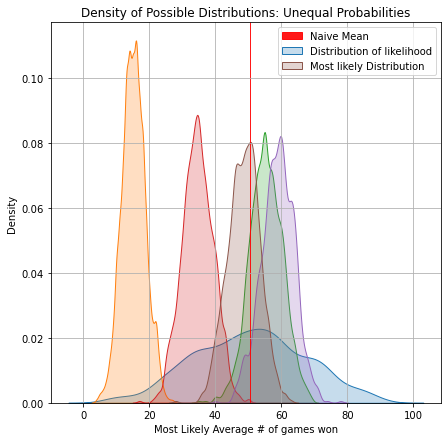

In [879]:
mean0 = np.mean(Avg_2[0])
std   = np.mean(Stdev_2)

title = "Density of Possible Distributions: Unequal Probabilities"
plt.figure(figsize=(7,7))
sns.kdeplot(Avg_2[0], bw_method=0.25,fill=True, common_norm=False, palette="crest",label ='Distribution of likelihood')
sns.kdeplot(multi_verse_2[13], bw_method=0.15,fill=True, common_norm=False, palette="crest")
sns.kdeplot(multi_verse_2[21], bw_method=0.15,fill=True, common_norm=False, palette="crest")
sns.kdeplot(multi_verse_2[408], bw_method=0.15,fill=True, common_norm=False, palette="crest")
sns.kdeplot(multi_verse_2[443], bw_method=0.15,fill=True, common_norm=False, palette="crest")
sns.kdeplot(multi_verse_2[18], bw_method=0.15,fill=True, common_norm=False, palette="crest",label = 'Most likely Distribution')
plt.axvspan(mean0, mean0, alpha=0.9, color='red',label = 'Naive Mean')
#plt.xlim(40,65)
plt.legend()
plt.title(title)
plt.grid()
plt.xlabel("Most Likely Average # of games won")
plt.show()